# Exploring Impacts of Snowpack Depth and Temperature Changes on the Ski Industry 
 Author: Jeremy Larkin
 
Date: May 17, 2023

Liscense: MIT -- https://opensource.org/licenses/MIT

## Introduction
A change in snowpack depth over time is important to hydrology because snowpack is a crucial piece in the hydrological cycle. Snowpack provides a store of freshwater that feeds rivers and transports water to the surrounding watersheds. Changes in snowpack volume and melt rate can have drastic effects on the environment and infrastructure. For example, a decrease in snowpack depth can lead to lower flow during melt season and drier streams in the summer, causing irrigation and water supply issues as well as a lack of water for plants and wildlife. On the flip side, an increase in snowpack depth can lead to more flooding impacting infrastructure and putting people at risk. More specifically, changes in snowpack have impacts on the ski industry and the economy of ski towns. If there is a significant change in snowpack over time, does the relationship of snowpack depth and temperature seem to be related?
 
A changing snowpack has the potential to create significant impacts on the ski industry. Of all places to study, Colorado is known for their ski conditions with the Rocky Mountains cutting through the state. A decrease in snowpack depth can lead to shorter ski seasons, reduced snow quality, and fewer visitors travelling to ski resorts. This can have significant economic impacts on the ski industry including decreased revenue, loss of jobs, and reduced investment in ski resort infrastructure.

On a larger scale, the ski industry contributes to the overall economy of local communities, most directly impacting small businesses and tourism-dependent industries. Therefore, changes in snowpack depth can have growing effects on the local economy, affecting the broader community. Many ski resorts have made investments in snowmaking technology to protect against climate change and changing snowfall conditions but not enough to replace the natural snowpack. 

## Research Question 

This experiment is designed to determine if there is a significant decrease in Colorado snowpack over the last couple decades, and if so could an increase in temperature have to do with it?

## Site Description
The extent of the study site is the Rocky Mountains of Colorado including multiple ski mountains such as Breckenridge and Arapahoe Basin surrounding the SNOTEL gauge on Grizzly Peak. SNOTEL stands for snow telemetry and it provides data including snow depth, temperature, snow water equivalent, and precipitation data at a high elevation location using an automated collection device. Grizzly Peak was chosen as the gauge site as its peak lies at an elevation of 13,427 ft where it is similar in both elevation and proximity to many Colorado ski mountains making it a great spot to gather temperature and snowpack data representative of goals of this project. For these reasons, it is assumed during this study that Grizzly peak represents the Rocky Mountain ski resorts.

### Grizzly Peak study site relative to the U.S.

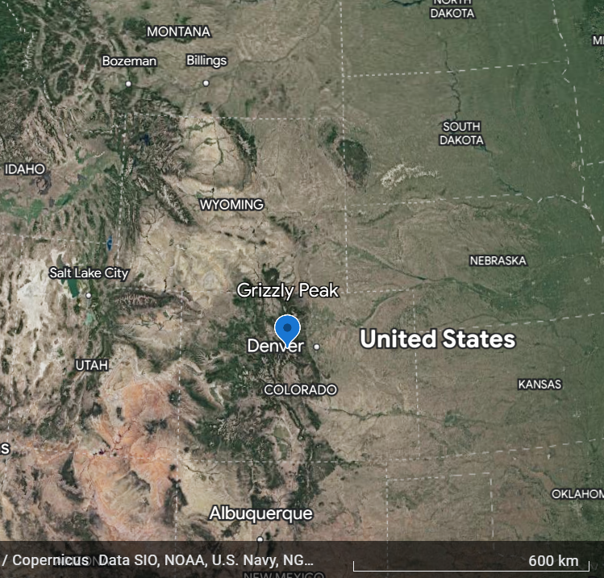


### Grizzly Peak study site relative to nearby ski resorts



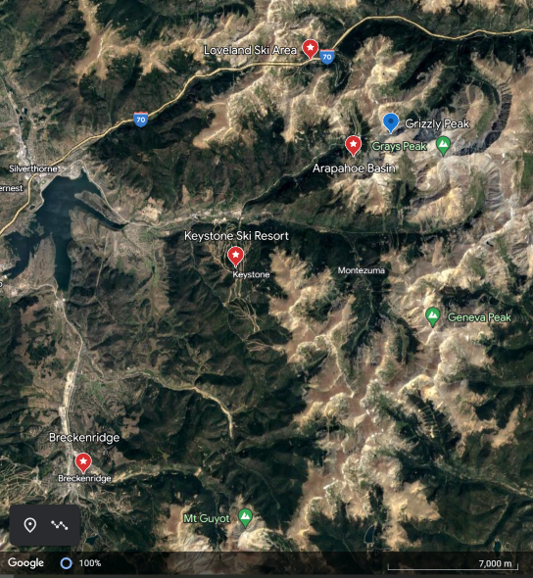

## Data Description
The dataset used in this study is daily snow depth and temperature SNOTEL data from the USDA site number 505, on Grizzly Peak, CO. The snow depth dataset has data for a duration of 22 years beginning in 2001 and continues through March of 2023. The temperature dataset has a 43 year data record beginning in 1980.

## Code

Importing packages to use specific modules and run a greater variety of functions

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import os
import datetime as datetime

Specifying parameters including the folders where the snowpack and temperature data is located, the title for all figures produced in the notebook, and the usable start and end years for the temperature data record

In [2]:
#%% Specify Parameters

subfolder_name_snow= "Grizzly Peak, CO Snowpack"

subfolder_name_temp= "Grizzly Peak, CO Temperature"

# Name of study site location used for figure titles
fig_title='Grizzly Peak, CO'

# Data file for first full year of snow depth data
infile_name_snow='505_25_YEAR=2001.csv'

# Data file for the first full year of temperature data
infile_name_temp='505_1_YEAR=1980.csv'

startdate_temp= '1984-01-01'

enddate_temp='2022-12-31'

Loading snowpack depth data for the year of 2001 and using a defined function to read the data then run the snow depth data from each year in the dataset using a "for loop". 

In [3]:
#%% Load snow depth data

# Read first year file and edit data using defined readsnotel function
def readsnotel(filename):
    data_snow=pd.read_csv(filename,header=1,na_values=[-99.9,201],parse_dates=['Date'],index_col='Date')
    data_snow=data_snow.rename(columns={'SNWD.I-1 (in) ':'Snowdepth (in)'})
    data_snow=data_snow[['Snowdepth (in)']]
    data_snow['Snowdepth (cm)']=data_snow['Snowdepth (in)']*2.54  #convert snow depth from in to cm
    return data_snow

filename_snow=os.listdir(subfolder_name_snow)

if 'data' in globals():
    del data_snow

#Use for loop to run all data 
for filename in filename_snow:
    data_snow1=readsnotel(subfolder_name_snow+'\\'+filename)
    try:
        data_snow=pd.concat([data_snow,data_snow1])
    except:
        data_snow=data_snow1
    data_snow.sort_index(inplace=True)

Loading temperature data for the first year on record (1980) and using a defined function to read each year of data. Using a "for loop" to run the temperature data from the entire dataset.

In [4]:
#%% Load Temperature Data

# Read first year file and edit data using defined readsnotel function
def readtemp(filename):
    data_temp=pd.read_csv(filename,header=1,na_values=[-99.9,33.2,0,-50],parse_dates=['Date'],index_col='Date')
    data_temp=data_temp[startdate_temp:enddate_temp]
    data_temp=data_temp.rename(columns={'TAVG.D-1 (degC) ':'Ave Temp (C)'})
    data_temp=data_temp[['Ave Temp (C)']]
    return data_temp

filename_temp=os.listdir(subfolder_name_temp)

#Use for loop to run all data 
for filename in filename_temp:
    data_temp1=readtemp(subfolder_name_temp+'\\'+filename)
    try:
        data_temp=pd.concat([data_temp,data_temp1])
    except:
        data_temp=data_temp1
    data_temp.sort_index(inplace=True)

Data cleaning. This process involves wrangling the data including removing outlier data and unreasonable values from the snow depth and temperature data.

In [5]:
#%% Snow Data Correction; Removing values with a large differential and filling them with the previous data point

for i in range (48):
    
    data_snow['difference']=data_snow['Snowdepth (cm)'].diff()
    data_snow.loc[data_snow['difference']>50,'Snowdepth (cm)']=np.nan
    data_snow.loc[data_snow['Snowdepth (cm)']<0,'Snowdepth (cm)']=np.nan
    data_snow.fillna(method='ffill',inplace=True)
    
# Temperature Data Correction; Removing outlier values  
data_temp.loc[data_temp['Ave Temp (C)']<-40,'Ave Temp (C)']=np.nan

Plotting snowpack depth in centimeters over the duration of the period of study. 

Text(0.5, 1.0, 'Grizzly Peak, CO')

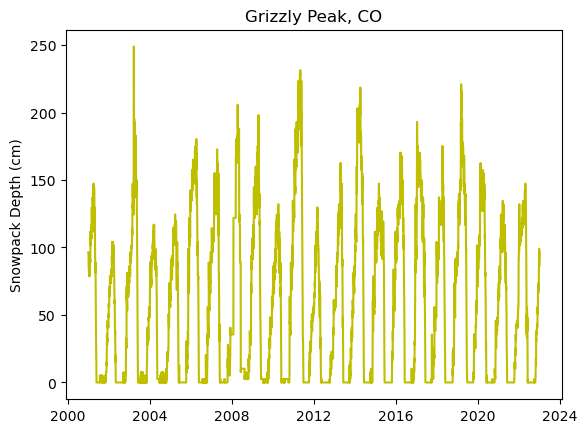

In [6]:
#%% Snowpack time series plot
    
fig, (ax1) =plt.subplots()

ax1.plot(data_snow['Snowdepth (cm)'],'y-')
ax1.set_ylabel('Snowpack Depth (cm)')
ax1.set_title(fig_title)

Plotting temperature data in degrees celcius over the duration of the study period

Text(0.5, 1.0, 'Grizzly Peak, CO')

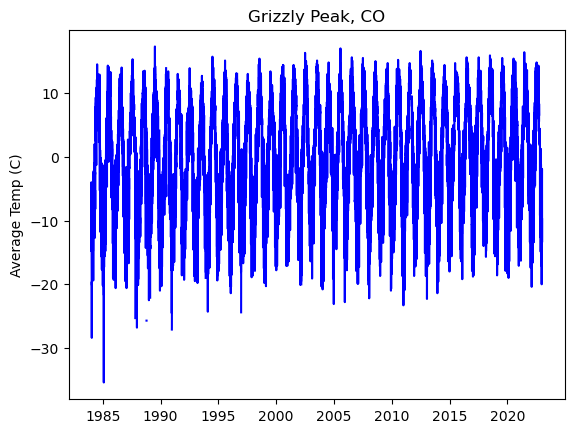

In [7]:
#%% Temperature time series plot

fig, (ax2) =plt.subplots()

ax2.plot(data_temp['Ave Temp (C)'],'b-')
ax2.set_ylabel('Average Temp (C)')
ax2.set_title(fig_title)


Plotting the yearly average snowpack every year on record. Using a linear regression and confidence intervals to statistically determine if there is a significant trend present. This will be determined by calculating the p-value. A p-value less than 0.05 signifies a statistically significant trend. 

Slope: 0.566
Intercept: -1082.813
Correlation coefficient: 0.287
P-value: 0.195
Standard error of the slope: 0.422


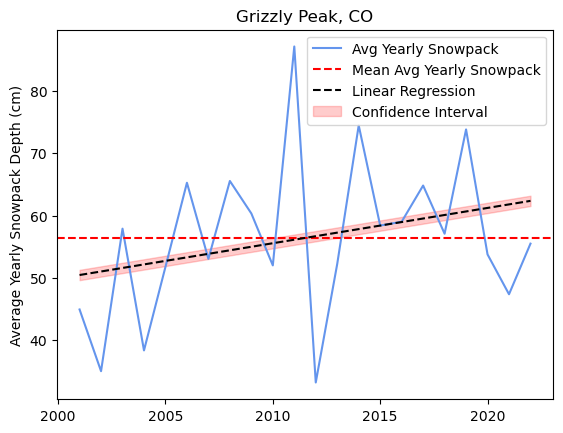

In [8]:
#%% Plot average yearly snowpack depth over the record

# Group snow depth data by year and calculate mean snow depth for each year
snow_yearly_mean = data_snow['Snowdepth (cm)'].groupby(data_snow.index.year).mean()

# Perform linear regression analysis on mean yearly snow data
slope, intercept, r_value, p_value, std_err = stats.linregress(snow_yearly_mean.index, snow_yearly_mean)

# Add trend line and confidence intervals to the plot
trendline = slope * snow_yearly_mean.index + intercept
ci_low = trendline - 1.96 * std_err
ci_high = trendline + 1.96 * std_err

# Plot yearly average snowpack depth over the record of time
fig, ax = plt.subplots()
# Plot yearly average snow pack over the record of time
ax.plot(snow_yearly_mean.index, snow_yearly_mean,'cornflowerblue',label='Avg Yearly Snowpack')
# Plot mean average yearly snow pack
ax.axhline(np.mean(snow_yearly_mean),color='r',linestyle='--',label='Mean Avg Yearly Snowpack')
# Add linear regression to plot
ax.plot(snow_yearly_mean.index, trendline, 'k--',label='Linear Regression')
ax.fill_between(snow_yearly_mean.index, ci_low, ci_high, color='r', alpha=0.2, label='Confidence Interval')
# Set y label
ax.set_ylabel('Average Yearly Snowpack Depth (cm)')
# Add figure title
ax.set_title(fig_title)
# Add legend
plt.legend()

# Print regression results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error of the slope: {std_err:.3f}")

Plotting the yearly average temperature every year on record. Using a linear regression and confidence intervals to statistically determine if there is a significant trend present. The p-value is calculated for the temperature regression.

Slope: 0.085
Intercept: -169.030
Correlation coefficient: 0.816
P-value: 0.000
Standard error of the slope: 0.010


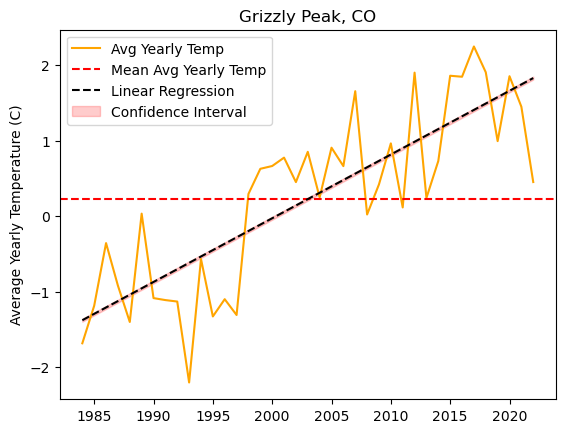

In [9]:
#%% Plot average yearly temperature over the record

# Group temperature data by year and calculate mean temperature for each year
temp_yearly_mean = data_temp['Ave Temp (C)'].groupby(data_temp.index.year).mean()

# Perform linear regression analysis on mean yearly temperature data
slope, intercept, r_value, p_value, std_err = stats.linregress(temp_yearly_mean.index, temp_yearly_mean)

# Add trend line and confidence intervals to the plot
trendline = slope * temp_yearly_mean.index + intercept
ci_low = trendline - 1.96 * std_err
ci_high = trendline + 1.96 * std_err

# Plot yearly average temperature over the record of time
fig, ax = plt.subplots()
# Plot average yearly temperature
ax.plot(temp_yearly_mean.index, temp_yearly_mean,'orange',label='Avg Yearly Temp')
# Plot mean average yearly temperature
ax.axhline(np.mean(temp_yearly_mean),color='r',linestyle='--',label='Mean Avg Yearly Temp')
#Set y label
ax.set_ylabel('Average Yearly Temperature (C)')
# Add linear regression to plot
ax.plot(temp_yearly_mean.index, trendline, 'k--',label='Linear Regression')
ax.fill_between(temp_yearly_mean.index, ci_low, ci_high, color='r', alpha=0.2, label='Confidence Interval')
# Set y label
ax.set_ylabel('Average Yearly Temperature (C)')
# Add figure title
ax.set_title(fig_title)
# Add legend
plt.legend()

# Print regression results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Correlation coefficient: {r_value:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error of the slope: {std_err:.3f}")


Plotting a continuous snowpack depth for every year on record to show the range and variability in the record

Text(0.5, 1.0, 'Grizzly Peak, CO')

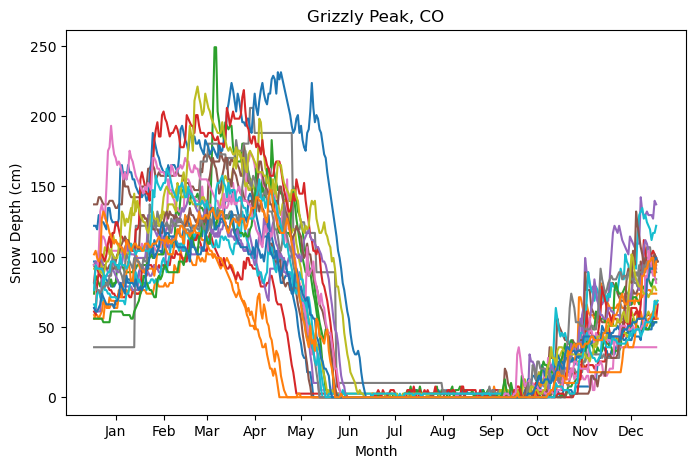

In [10]:
#%% Yearly snowpack data by year

# Define the x-axis tick positions and labels
ticks = [15, 46, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

# Loop over each year in the data and plot the snow depth vs day of year
for year, data in data_snow.groupby(data_snow.index.year):
    ax.plot(data.index.dayofyear, data['Snowdepth (cm)'], label=str(year))

# Set the x-axis tick positions and labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Snow Depth (cm)')
ax.set_title(fig_title)


In [11]:
#%% Measuring yearly variation in snowpack measurements

for year, data in data_snow.groupby(data_snow.index.year):
    print(f"Year {year}: Standard Deviation = {data['Snowdepth (cm)'].std():.2f} cm")

Year 2001: Standard Deviation = 50.54 cm
Year 2002: Standard Deviation = 37.75 cm
Year 2003: Standard Deviation = 63.37 cm
Year 2004: Standard Deviation = 39.99 cm
Year 2005: Standard Deviation = 48.49 cm
Year 2006: Standard Deviation = 65.66 cm
Year 2007: Standard Deviation = 59.01 cm
Year 2008: Standard Deviation = 66.36 cm
Year 2009: Standard Deviation = 60.65 cm
Year 2010: Standard Deviation = 45.96 cm
Year 2011: Standard Deviation = 82.87 cm
Year 2012: Standard Deviation = 40.55 cm
Year 2013: Standard Deviation = 48.62 cm
Year 2014: Standard Deviation = 76.52 cm
Year 2015: Standard Deviation = 51.35 cm
Year 2016: Standard Deviation = 61.01 cm
Year 2017: Standard Deviation = 64.99 cm
Year 2018: Standard Deviation = 54.04 cm
Year 2019: Standard Deviation = 69.05 cm
Year 2020: Standard Deviation = 58.56 cm
Year 2021: Standard Deviation = 45.08 cm
Year 2022: Standard Deviation = 53.29 cm


Plotting a continuous temperature for every year on record to show the range and variability in the record

Text(0.5, 1.0, 'Grizzly Peak, CO')

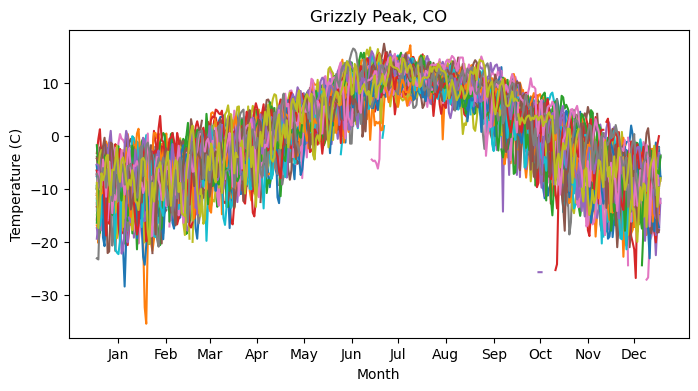

In [12]:
#%% Yearly temperature data by year

# Define the x-axis tick positions and labels
ticks = [15, 46, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 4))

# Loop over each year in the data and plot the temperature vs day of year
for year, data in data_temp.groupby(data_temp.index.year):
    ax.plot(data.index.dayofyear, data['Ave Temp (C)'], label=str(year))

# Set the x-axis tick positions and labels
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (C)')
ax.set_title(fig_title)


In [13]:
#%% Measuring yearly variation in temperature measurements

for year, data in data_temp.groupby(data_temp.index.year):
    print(f"Year {year}: Standard Deviation = {data['Ave Temp (C)'].std():.2f} deg C\t", end="")
    if year % 2 == 0:
        print() # Create two columns of variation results

Year 1984: Standard Deviation = 8.79 deg C	
Year 1985: Standard Deviation = 8.97 deg C	Year 1986: Standard Deviation = 7.65 deg C	
Year 1987: Standard Deviation = 9.09 deg C	Year 1988: Standard Deviation = 9.50 deg C	
Year 1989: Standard Deviation = 8.66 deg C	Year 1990: Standard Deviation = 8.43 deg C	
Year 1991: Standard Deviation = 8.33 deg C	Year 1992: Standard Deviation = 7.89 deg C	
Year 1993: Standard Deviation = 7.84 deg C	Year 1994: Standard Deviation = 8.74 deg C	
Year 1995: Standard Deviation = 7.82 deg C	Year 1996: Standard Deviation = 8.75 deg C	
Year 1997: Standard Deviation = 8.45 deg C	Year 1998: Standard Deviation = 8.37 deg C	
Year 1999: Standard Deviation = 7.26 deg C	Year 2000: Standard Deviation = 8.21 deg C	
Year 2001: Standard Deviation = 7.96 deg C	Year 2002: Standard Deviation = 8.90 deg C	
Year 2003: Standard Deviation = 8.06 deg C	Year 2004: Standard Deviation = 7.69 deg C	
Year 2005: Standard Deviation = 7.97 deg C	Year 2006: Standard Deviation = 7.86 deg C	

## Methods
Defined functions (readsnotel and readtemp) were used to gather and organize the snowpack and temperature data before editing and plotting the data.

For loops were used in loading the snowpack depth and temperature data allowing the loading process to run through all the yearly data files downloaded from SNOTEL.

In the average yearly snowpack and average yearly temperature graphs, a statistical linear regression with confidence intervals was used to calculate p-values to determine if any trends were statistically significant. 

Standard deviation was used to calculate the variation in data for every year on record for both the snowpack and temperature data. 


## Results and Discussion

The average yearly snowpack graph does not appear to show any clear trends over the period of record. From 2001 to 2008 the average yearly snowpack increases then evens out over the period form 2008 to 2022. The p-value from the linear regression is 0.195 making the trend not statistically significant. This aligns with the visual interpretation where there are ups and downs but no decisive trend. It is important to point out that the period of record for snowpack data on Grizzly Peak is a short 21 years so any long term trends that may be present are not visible when graphing the available Grizzly Peak data. 

The average yearly temperature graph visually follows a tend starting at a average of around -2 degree celcius at the beginning of the record in the early 1980s and rises steadily until the average appears to be about 2 degrees celcius in the late 2010s into the 2020s. While it is only 40 years of data it displays a strong trend of increasing temperature over time. This trend is  supported with an extremely low p-value of 0.000 (well below 0.05) making it a statistically significant trend. The warming trend also supports the climate data showing the earth has been warming over the last few hundred years including the 40 years in this data record. 

Measuring variability with standard devation, about 68% of data from a dataset from each year falls within one standard deviation of the mean. Therefore the last two graphs show 68% of the snowpack data generally falls within about 35 to 70 cm of the mean snowpack on any given year while 68% of temperature data remains within 7 to 10 degrees Celcius of the mean. The snowpack data appears to have significant variability with a wide range of data within one standard deviation of the mean. 

Aside from the legth of the data sets, particularly the snowpack data, another limitation of this study was the potential of seasonality in temperature where summers could be getting hotter causing the average yearly temperature to be increasing while the winters are not experiencing a real change in temperature. This phenomenon would lead to the identified warming trend not having a large impact on snowpack depth and melt. 

## Conclusion

Despite a trend of increasing temperature from the early 1980s to 2023 there was no significant trend in shrinking snowpack depth throughout the Grizzly Peak snowpack data period. There was no clear evidence pointing to warmer average yearly temperatures having a direct significant effect on snowpack. 

However, if average temperatures continue to rise and follow the existing trend there may be more severe effects on the ski industry and the people who rely on ski tourism. These impacts may be in the form of a shorter ski season or more winter days that are too warm to ski, and may ultimately affect tourism and the greater Colorado economy looking forward.

## References

       
      
      Google Earth. "Google Earth Web." Google, n.d., https://earth.google.com/web/.
    
      14ers.com. "Route Description: Capitol Peak." 14ers.com, 2010, https://www.14ers.com/route.php?route=20100327453.